In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [3]:
df_parents = pd.read_csv('../data/df_max_parents_other_infections.csv').rename(columns = {' cov_weight':'COVID_weight','IAV_weight':'IAV_weight','TB_ave_weight':'TB_weight_loss'})

In [4]:
columns_to_average = list(df_parents.columns)[3:]
columns_to_df = []
for col in columns_to_average:
    columns_to_df.append(col+'.mean')
    columns_to_df.append(col+'.std')

df_parents_averages = pd.DataFrame(columns = ['Strain']+columns_to_df)

for strain,strain_data in df_parents.groupby('Strain'):
    row = {'Strain':[strain]}
    for col in columns_to_average:
        row[col+'.mean'] = [strain_data[col].mean()]
        row[col+'.std'] = [strain_data[col].std()]
    df_parents_averages = pd.concat([df_parents_averages,pd.DataFrame(row)],ignore_index=True)
df_parents_averages.dropna()
print(df_parents_averages)

        Strain  Max.Parasitemia.mean  Max.Parasitemia.std  \
0  129S1/SvImJ               0.32774             0.020226   
1          A/J               0.35898             0.030233   
2     C57BL/6J               0.33130             0.106782   
3     CAST/EiJ               0.43930             0.073556   
4   NOD/ShiLtJ               0.37826             0.033383   
5    NZO/HILtJ               0.23942             0.034730   
6      PWK/PhJ               0.60310             0.071063   
7      WSB/EiJ               0.08240             0.122695   

   Max.Weight.Delta.mean  Max.Weight.Delta.std  Max.RBC.Delta.mean  \
0               2.440000              0.527257        14362.200000   
1               4.400000              0.809321        13681.000000   
2               3.600000              1.220656        13473.400000   
3               2.175000              2.156193        14322.500000   
4               2.780000              1.614621        12187.200000   
5               2.340000      

/var/folders/rv/5ptfmp3s2vv4bd8tl_hpwgw00000gp/T/ipykernel_49205/1888512515.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_parents_averages = pd.concat([df_parents_averages,pd.DataFrame(row)],ignore_index=True)


-0.3885462659282199 -0.45629419550772643 0.3034264711198197
-0.04200174334326739 -0.07285616634458038 0.8766435289283646
-0.7426198294373321 -0.054703748108500365 0.9072709241874017
-0.3099533790905397 -0.5552658257224574 0.1956773365987975
-0.2990015074349132 -0.3886662199083074 0.38886590588473874


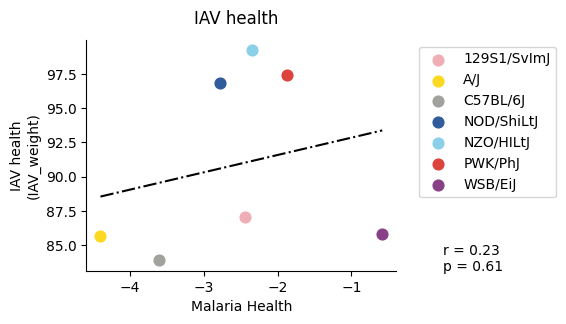

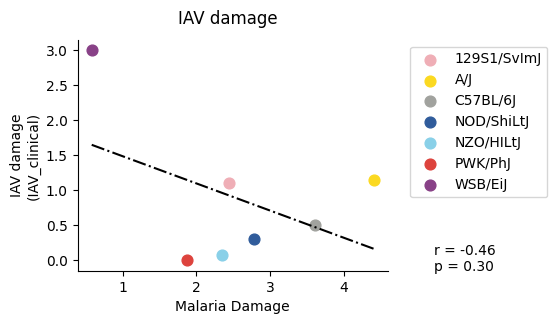

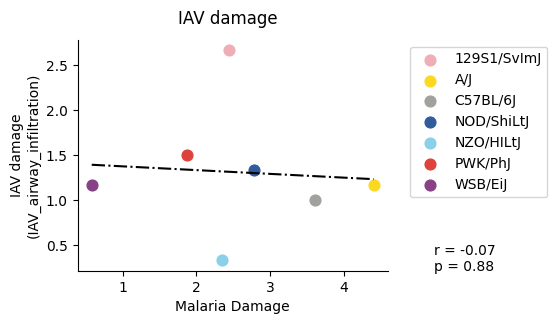

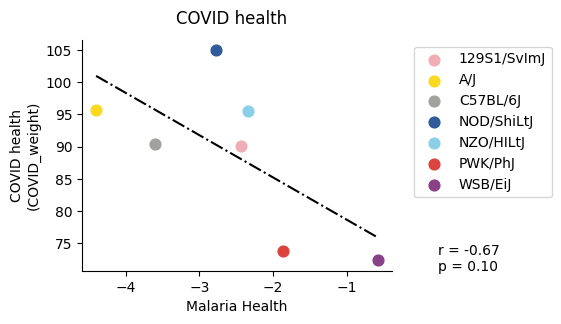

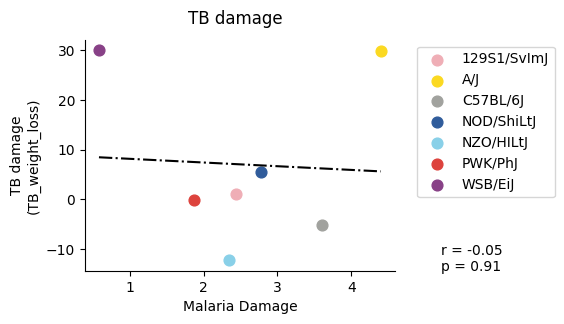

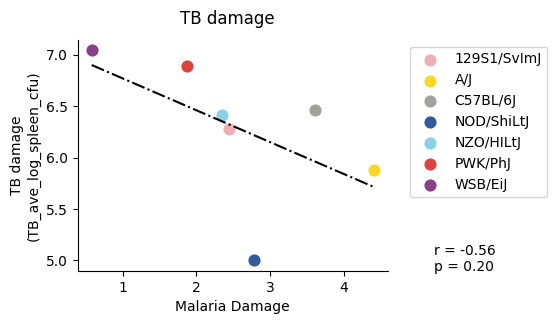

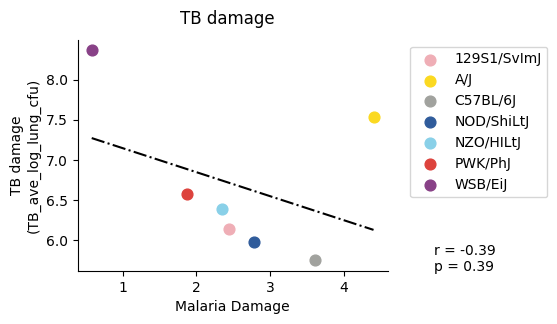

In [5]:
others = ['IAV_weight','IAV_clinical','IAV_airway_infiltration','COVID_weight','TB_weight_loss','TB_ave_log_spleen_cfu','TB_ave_log_lung_cfu']
%matplotlib inline
colors_dict = {'A/J':'#fbd921', 'C57BL/6J':'#a1a29e','C57BL/6':'#a1a29e', '129S1/SvImJ':'#efaeb6',
               'NOD/ShiLtJ':'#305c9b','NZO/HILtJ':'#89d0e8','PWK/PhJ':'#dd433d',
                'CAST/EiJ':'#4eaf47','WSB/EiJ':'#884187','DO':'#cfcec8'}

for o in others:
    fig,ax = plt.subplots(figsize = (4,3))
    disease = o.split('_')[0]
    if o=='IAV_weight' or o=='COVID_weight':
        x = []
        y = []
        xerr = []
        yerr = []
        for strain, strain_data in df_parents_averages.groupby('Strain'):
                if strain != 'CAST/EiJ':
                    ax.scatter(-strain_data['Max.Weight.Delta.mean'],strain_data[o+'.mean'],label = strain,s = 60,c = colors_dict[strain])
                    x += (-strain_data['Max.Weight.Delta.mean']).to_list()
                    y += strain_data[o+'.mean'].to_list()
                    xerr += strain_data['Max.Weight.Delta.mean'].to_list()
                    yerr += strain_data[o+'.std'].to_list()
        ax.set_xlabel('Malaria Health')
        ax.set_ylabel(disease+' health\n('+o+')')
        fig.suptitle(disease+' health')
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        x_to_plot = np.sort(x)
        y_fit = slope * np.array(x_to_plot) + intercept
        ax.plot(x_to_plot,y_fit, '-.', color = 'black')

    else:
        x = []
        y = []
        for strain, strain_data in df_parents.groupby('Strain'):
            if strain != 'CAST/EiJ':
                if o=='TB_weight_loss':
                    ax.scatter(strain_data['Max.Weight.Delta'].mean(),-strain_data[o].mean(),label = strain,s = 60,c = colors_dict[strain])
                    x.append(strain_data['Max.Weight.Delta'].mean())
                    y.append(-strain_data[o].mean())

                else:
                    ax.scatter(strain_data['Max.Weight.Delta'].mean(),strain_data[o].mean(),label = strain,s = 60,c = colors_dict[strain])
                    x.append(strain_data['Max.Weight.Delta'].mean())
                    y.append(strain_data[o].mean())
        slope, intercept, r_value, p_value, std_err = linregress(x,y)
        x_to_plot = np.sort(x)
        y_fit = slope * np.array(x_to_plot) + intercept
        ax.plot(x_to_plot,y_fit, '-.', color = 'black')
        ax.set_xlabel('Malaria Damage')
        ax.set_ylabel(disease+' damage\n('+o+')')
        fig.suptitle(disease+' damage')
        print(slope, r_value, p_value)
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.05, 1))
    ax.spines[['top','right']].set_visible(False)
    #fig.savefig(f'{o}.png',dpi = 600, bbox_inches = 'tight')
    #fig.savefig(f'{o}.pdf',dpi = 600, bbox_inches = 'tight')
    ax.text(1.15, 0, f'r = {r_value:.2f} \np = {p_value:.2f}',transform=ax.transAxes)
